<h1 style="font-family: Georgia; font-size:3em;color:#2462C0; font-style:bold">
Coding Neural Network - Regularization
</h1><br>

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Bias-Variance Trade-off
</h2>
<p align="center">
<img src="posts_images/coding_nn_from_scratch/bias_variance_v2.png" style="height:400px; width:600px">
<caption><center><u><b><font color="purple">Figure 1:</font></b></u> Bias and variance as a function of model complexity (flexibility). [Source](http://scott.fortmann-roe.com/docs/BiasVariance.html)</center></caption>
</p>

Generalization (test) error is the most important metric in Machine/Deep Learning. It gives us an estimate on the performance of the model on unseen data. Test error is decomposed into 3 parts (see figure 1): **Variance, Squared-Bias, and Irreducible Error**. Models with high bias are not complex enough (too simple) for the data and tend to underfit. The simplest model is taking the average (mode) of target variable and assign it to all predictions. On the contrary, models with high variance overfit the training data by closely follow (mimick) the training data where the learning algorithm will follow the signal and the noise. Note that as the complexity (flexibility) of the model increases → the model will become less interpretable such as Neural Networks. Below is the bias-variance decomposition:
$$MSE = E(y - \widehat{y})^2\\{}$$
$$= E(y - f + f - \widehat{y})^2\\{}$$
$$= E\big\{(y - f)^2 + 2(y - f)(f - \widehat{y}) + (f - \widehat{y})^2\big\};\quad substitute\ y = f + \epsilon\\{}$$
$$= E\big\{(\epsilon + f - f)^2 + 2(\epsilon + f - f)(f - \widehat{y}) + (f - \widehat{y})^2\big\}\\{}$$
$$= E(\epsilon)^2 + E(\epsilon)E(f - \widehat{y}) + E(f - \widehat{y})^2; \quad where\ E(\epsilon) = 0\\{}$$
$$= E(\epsilon)^2 + E(f - \widehat{y})^2;\quad add\ and\ subtract\ E(\widehat{y})\\{}$$
$$= E(\epsilon)^2 + E(f - E(\widehat{y}) + E(\widehat{y}) - \widehat{y})^2\\{}$$
$$= E(\epsilon)^2 + E(f - E(\widehat{y}))^2 + E(\widehat{y} - E(\widehat{y}))^2\\{}$$
$$\Rightarrow MSE = var(\widehat{y}) + (Bias(\widehat{y}))^2 + var(\epsilon)\\{}$$
Where:
- $var(\epsilon)$: Irreducible error that resulted from omitted features and unmeasured variation with each example.
- $Bias(\widehat{y})$: Error that is introduced by approximating a real-life problem with a simple model.
- $var(\widehat{y})$: amount by which $\widehat{y}$ would change if we estimated it using different data set.

Therefore, we can control only the variance and the bias of the $\widehat{y}$ **BUT NOT** irreducible error. As a result, our job is to try to estimate the right level of complexity to achieve the lowest test error.

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Regularization
</h2><br>
Regularization adds stability to the learning algorithm by making it less sensitive to the training data and processes. Since we don't know and have no access to the true function that we can use to compare our estimated function with it, the best strategy would be to build a very complex model that fits the training data really well (overfitting) and regularize it so that it would have a good generalization (test) error. When using regularization, we try to reduce the generalization error and that may lead to increase the training error in the process which is okay because what we care about is how well the model generalizes. With regularization, we try to bring back the very complex model that suffers from overfitting to a good model by increasing bias and reducing variance. This builds on the assumption that complex model has large parameters and simple model has small parameters.

Below are some methods used for regularization:
1. **L2 Parameter Regularization**: It's also known as **weight decay**. This method adds L2 norm penalty to the objective function to drive the weights towards the origin. Even though this method shrinks all weights by the same proportion towards zero; however, it will never make any weight to be exactly zero.
2. **L1 Parameter Regularization (Lasso)**: It can be seen as a feature selection method because; in contrast to L2 regularization, some weights will be actually zero. It shrinks all weights by the same amount by adding L1 norm penalty to the objective function.
3. **Dropout**: Dropout can be seen as an approximation to bagging techniques. On each iteration, we randomly shut down some neurons on each layer and don't use those neurons in both forward propagation and back-propagation. This will force the neural network to spread out weights and not focus on specific neurons because it will never know which neurons will show up on each iteration. Therefore, it can be seen as training different model on each iteration. Also, since we drop some neurons on each iteration, this will lead to smaller network which in turns means simpler network.
4. **Augmentation**: Add fake data by using the training examples and adding distortions to them such as rescaling and rotating the images in the case of image recognition. The idea here is that it's always better to train the model on more data to achieve better performance. Note that augmented examples don't add much information to the model as much as independent examples do but still it's a valid alternative when collecting more data is not feasible.
5. **Early Stopping**: This method tries to optimize the cost function and regularize it so that it would have lower generalization error. The way it works is that on each iteration we record the validation error. If the validation error improves, we store a copy of the parameters and will continue until the optimization algorithm terminates. It's a good method if computational time and resources is an issue for us.

In this notebook, we'll cover L2 parameter regularization.

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
L2 Parameter Regularization
</h2>

We normally don't regularize bias and regularize weights only. We can use hessian matrix and it's eigenvalues and eigenvectors to see the sensitivity of the weights to the weight decay. The weight $w_i$ will be rescaled using $\frac{\lambda_i}{\lambda_i + \alpha}$ where $\lambda_i$ (eigenvalue) measures the sensitivity of hessian matrix in that direction (eigenvector) and $\alpha$ is the regularized hyperparameter. Therefore,
- If $\lambda_i >> \alpha$, the cost function is very sensitive in that direction and the corresponding weight reduces the cost significantly $\Rightarrow$ don't decay (shrink) much.
- If $\lambda_i << \alpha$, the cost function is not sensitive in that direction and the corresponding weight doesn't reduce the cost significantly $\Rightarrow$ decay (shrink) away towards zero.

The objective function (binary cross-entropy) would then change from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{binary cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_{l=1}^L\sum\limits_{i=1}^{n^l}\sum\limits_{j=1}^{n^{l-1}} W_{j,i}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$
Also, the new gradients and the update equation would be:
$$\nabla_w J_{regularized} = \nabla_w J + \frac{\lambda}{m}w\\{}$$
$$w = w - \alpha\nabla_w J - \alpha\frac{\lambda}{m}w\\{}$$
$$\Rightarrow w = w\underbrace{(1 - \alpha\frac{\lambda}{m})}_\text{weight decay} - \nabla J$$
Note that here $\alpha$ is the learning rate and $\lambda$ is the regularized hyperparameter. As $\lambda$ increases, the bias increases (and the model becomes less flexible) with the following extreme cases (see figure 2):
- $\lambda = 0$, no regularization.
- $\lambda \rightarrow \infty$, model becomes very simple where all weights are essentially zero. In the case of regression, we would end-up with the intercept only which is equal to the average of the target variable.

<p align="center">
<img src="posts_images/coding_nn_from_scratch/bias_variance_lambda.png" style="height:400px; width:600px">
<caption><center><u><b><font color="purple">Figure 2:</font></b></u> Model complexity (underfitting/overfitting) as a function of regularization parameter $\lambda$</center></caption>
</p>
It sometimes maybe helpful to see how L2 parameter regularization works using normal equation. The normal quation is:
$$W = (X^TX + \lambda I)^{-1}X^TY\tag{3}$$
This means that:
- Adding $\lambda$ to the variance would decrease the weight since $w_i = \frac{cov_{x, y}}{\sigma^2_x}$.
- Even if $X^TX$ is not invertible, adding $\lambda$ to each feature will make it full rank matrix $\Rightarrow$ invertible.

To illustrate how regularization helps us reduce generalization error, we'll use the cats_vs_dogs dataset. The dataset has images for cats and dogs. We'll try to build a neural network to classify if the image has a cat or a dog. Each image is 64 x 64 pixels on RGB scale.

We'll be using functions we wrote in [*"Coding Neural Network - Forward Propagation and Backpropagation"*](https://nbviewer.jupyter.org/github/ImadDabbura/blog-posts/blob/master/notebooks/Coding-Neural-Network-Forwad-Back-Propagation.ipynb) notebook to initialize parameters, compute forward propagation, cross-entropy cost, gradients, etc.

Let's import the data and take a look at the shape as well as a sample of a cat image from the training set.

In [1]:
# Loading packages
import sys

import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path.append("../scripts/")
from coding_neural_network_from_scratch import (initialize_parameters,
                                                L_model_forward,
                                                compute_cost,
                                                relu_gradient,
                                                sigmoid_gradient,
                                                tanh_gradient,
                                                update_parameters,
                                                accuracy)
from gradient_checking import dictionary_to_vector
from load_dataset import load_dataset_catvsdog

%matplotlib inline
sns.set_context("notebook")
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (12, 6)

Training data dimensions:
X's dimension: (12288, 209), Y's dimension: (1, 209)
Test data dimensions:
X's dimension: (12288, 50), Y's dimension: (1, 50)


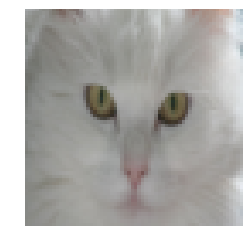

In [2]:
# Import training data
train_dataset = h5py.File("../data/train_catvnoncat.h5")
X_train = np.array(train_dataset["train_set_x"])
Y_train = np.array(train_dataset["train_set_y"])

# Plot a sample image
plt.imshow(X_train[50])
plt.axis("off");

# Import test data
test_dataset = h5py.File("../data/test_catvnoncat.h5")
X_test = np.array(test_dataset["test_set_x"])
Y_test = np.array(test_dataset["test_set_y"])

# Transform data
X_train = X_train.reshape(209, -1).T
X_train = X_train / 255
Y_train = Y_train.reshape(-1, 209)

X_test = X_test.reshape(50, -1).T
X_test = X_test / 255
Y_test = Y_test.reshape(-1, 50)

# print the new shape of both training and test datasets
print("Training data dimensions:")
print("X's dimension: {}, Y's dimension: {}".format(X_train.shape, Y_train.shape))
print("Test data dimensions:")
print("X's dimension: {}, Y's dimension: {}".format(X_test.shape, Y_test.shape))

The training set has 209 examples and the test set has 50 examples. Let's first write all the helper functions that would help us write the multi-layer neural network.

In [3]:
def compute_cost_reg(AL, y, parameters, lambd=0):
    """
    Computes the Cross-Entropy cost function with L2 regularization.

    Arguments
    ---------
    AL : 2d-array
        probability vector of shape 1 x training_examples.
    y : 2d-array
        true "label" vector.
    parameters : dict
        contains all the weight matrices and bias vectors for all layers.
    lambd : float
        regularization hyperparameter.

    Returns
    -------
    cost : float
        binary cross-entropy cost.
    """
    # number of examples
    m = y.shape[1]

    # compute traditional cross entropy cost
    cross_entropy_cost = compute_cost(AL, y)

    # convert parameters dictionary to vector
    parameters_vector = dictionary_to_vector(parameters)

    # compute the regularization penalty
    L2_regularization_penalty = (
        lambd / (2 * m)) * np.sum(np.square(parameters_vector))

    # compute the total cost
    cost = cross_entropy_cost + L2_regularization_penalty

    return cost


def linear_backword_reg(dZ, cache, lambd=0):
    """
    Computes the gradient of the output w.r.t weight, bias, & post-activation
    output of (l - 1) layers at layer l.
    
    Arguments
    ---------
    dZ : 2d-array
        gradient of the cost w.r.t. the linear output (of current layer l).
    cache : tuple
        values of (A_prev, W, b) coming from the forward propagation in the
        current layer.
    lambd : float
        regularization hyperparameter.

    Returns
    -------
    dA_prev : 2d-array
        gradient of the cost w.r.t. the activation (of the previous layer l-1).
    dW : 2d-array
        gradient of the cost w.r.t. W (current layer l).
    db : 2d-array
        gradient of the cost w.r.t. b (current layer l).
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1 / m) * np.dot(dZ, A_prev.T) + (lambd / m) * W
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db


def linear_activation_backward_reg(dA, cache, activation_fn="relu", lambd=0):
    """
    Arguments
    ---------
    dA : 2d-array
        post-activation gradient for current layer l.
    cache : tuple
        values of (linear_cache, activation_cache).
    activation : str
        activation used in this layer: "sigmoid", "tanh", or "relu".
    lambd : float
        regularization hyperparameter.

    Returns
    -------
    dA_prev : 2d-array
        gradient of the cost w.r.t. the activation (of previous layer l-1),
        same shape as A_prev.
    dW : 2d-array
        gradient of the cost w.r.t. W (current layer l), same shape as W.
    db : 2d-array
        gradient of the cost w.r.t. b (current layer l), same shape as b.
    """
    linear_cache, activation_cache = cache

    if activation_fn == "sigmoid":
        dZ = sigmoid_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword_reg(dZ, linear_cache, lambd)

    elif activation_fn == "tanh":
        dZ = tanh_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword_reg(dZ, linear_cache, lambd)

    elif activation_fn == "relu":
        dZ = relu_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword_reg(dZ, linear_cache, lambd)

    return dA_prev, dW, db


def L_model_backward_reg(AL, y, caches, hidden_layers_activation_fn="relu",
                         lambd=0):
    """
    Computes the gradient of output layer w.r.t weights, biases, etc. starting
    on the output layer in reverse topological order.
    
    Arguments
    ---------
    AL : 2d-array
        probability vector, output of the forward propagation
        (L_model_forward()).
    y : 2d-array
        true "label" vector (containing 0 if non-cat, 1 if cat).
    caches : list
        list of caches for all layers.
    hidden_layers_activation_fn :
        activation function used on hidden layers: "tanh", "relu".
    lambd : float
        regularization hyperparameter.

    Returns
    -------
    grads : dict
        gradients.
    """
    y = y.reshape(AL.shape)
    L = len(caches)
    grads = {}

    dAL = np.divide(AL - y, np.multiply(AL, 1 - AL))

    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] =\
        linear_activation_backward_reg(dAL, caches[L - 1], "sigmoid", lambd)

    for l in range(L - 1, 0, -1):
        current_cache = caches[l - 1]
        grads["dA" + str(l - 1)], grads["dW" + str(l)], grads["db" + str(l)] =\
            linear_activation_backward_reg(
                grads["dA" + str(l)], current_cache,
                hidden_layers_activation_fn, lambd)

    return grads


def model_with_regularization(
        X, y, layers_dims, learning_rate=0.01,  num_epochs=3000,
        print_cost=False, hidden_layers_activation_fn="relu", lambd=0):
    """
    Implements L-Layer neural network.

    Arguments
    ---------
    X : 2d-array
        data, shape: number of examples x num_px * num_px * 3.
    y : 2d-array
        true "label" vector, shape: 1 x number of examples.
    layers_dims : list
        input size and size of each layer, length: number of layers + 1.
    learning_rate : float
        learning rate of the gradient descent update rule.
     num_epochs : int
        number of times to over the training data.
    print_cost : bool
        if True, it prints the cost every 100 steps.
    hidden_layers_activation_fn : str
        activation function to be used on hidden layers: "tanh", "relu".
    lambd : float
        regularization hyperparameter.

    Returns
    -------
    parameters : dict
        parameters learnt by the model. They can then be used to predict test
        examples.
    """
    # get number of examples
    m = X.shape[1]

    # to get consistents output
    np.random.seed(1)

    # initialize parameters
    parameters = initialize_parameters(layers_dims)

    # intialize cost list
    cost_list = []

    # implement gradient descent
    for i in range(num_epochs):
        # compute forward propagation
        AL, caches = L_model_forward(
            X, parameters, hidden_layers_activation_fn)

        # compute regularized cost
        reg_cost = compute_cost_reg(AL, y, parameters, lambd)

        # compute gradients
        grads = L_model_backward_reg(
            AL, y, caches, hidden_layers_activation_fn, lambd)

        # update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # print cost
        if (i + 1) % 100 == 0 and print_cost:
            print("The cost after {} iterations: {}".format(
                (i + 1), reg_cost))

        # append cost
        if i % 100 == 0:
            cost_list.append(reg_cost)

    # plot the cost curve
    plt.plot(cost_list)
    plt.xlabel("Iterations (per hundreds)")
    plt.ylabel("Cost")
    plt.title("Cost curve for the learning rate = {}".format(learning_rate))

    return parameters

Now we're ready to train the neural network. We'll first build a neural network with no regularization and then one with regularization to see which one has lower generalization error. Note that $\lambda$ should be tuned to get the best results but we'll here choose an arbitrary value to illustrate the concept. Both neural netwotks would have 2 hidden layers where each hidden layer has 5 units.

The cost after 100 iterations: 0.6555634398145331
The cost after 200 iterations: 0.6467746423961933
The cost after 300 iterations: 0.6446638811282552
The cost after 400 iterations: 0.6441400737542232
The cost after 500 iterations: 0.6440063101787575
The cost after 600 iterations: 0.6439697872317176
The cost after 700 iterations: 0.6439570623358253
The cost after 800 iterations: 0.6439491872993496
The cost after 900 iterations: 0.6439407592837082
The cost after 1000 iterations: 0.6439294591543208
The cost after 1100 iterations: 0.6439131091764411
The cost after 1200 iterations: 0.6438883396380859
The cost after 1300 iterations: 0.6438489715870495
The cost after 1400 iterations: 0.6437825798034876
The cost after 1500 iterations: 0.6436617691190204
The cost after 1600 iterations: 0.6434191397054715
The cost after 1700 iterations: 0.642864008138056
The cost after 1800 iterations: 0.6413476000796884
The cost after 1900 iterations: 0.6360827945885947
The cost after 2000 iterations: 0.6124050

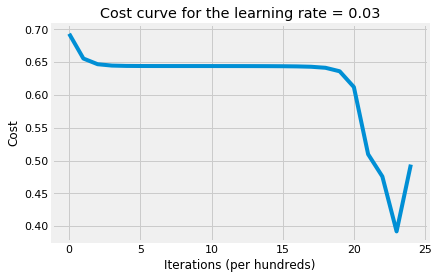

In [4]:
# set up layers dimensions
layers_dims = [X_train.shape[0], 5, 5, 1]

# train NN
parameters = model_with_regularization(X_train, Y_train, layers_dims,
                                       learning_rate=0.03, num_epochs=2500, print_cost=True,
                                       hidden_layers_activation_fn="tanh",
                                       lambd=0)

# print the test accuracy
print("The training accuracy rate: {}".format(accuracy(X_train, parameters, Y_train, "tanh")[-7:]))
print("The test accuracy rate: {}".format(accuracy(X_test, parameters, Y_test, "tanh")[-7:]))

The training accuracy is 82.30% but the test accuracy is 78%. The difference between training and test accuracy is not that much, i.e. we don't have a lot of overfitting. Therefore, a little bit of regularization may help such as $\lambda = 0.02$. Values of $\lambda$s that practitioners recommend are: 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12, 10.24.

The cost after 100 iterations: 0.6558634554205135
The cost after 200 iterations: 0.6470807090618383
The cost after 300 iterations: 0.6449737235917311
The cost after 400 iterations: 0.6444519406797673
The cost after 500 iterations: 0.6443191828114609
The cost after 600 iterations: 0.6442831256251426
The cost after 700 iterations: 0.6442705985766486
The cost after 800 iterations: 0.6442628048800636
The cost after 900 iterations: 0.6442544325786784
The cost after 1000 iterations: 0.6442432311807257
The cost after 1100 iterations: 0.6442270988055475
The cost after 1200 iterations: 0.6442027847231018
The cost after 1300 iterations: 0.6441643410411311
The cost after 1400 iterations: 0.6440998547029029
The cost after 1500 iterations: 0.6439832000181198
The cost after 1600 iterations: 0.6437505375793907
The cost after 1700 iterations: 0.6432228625403317
The cost after 1800 iterations: 0.6417982979158361
The cost after 1900 iterations: 0.6369273437378263
The cost after 2000 iterations: 0.615277

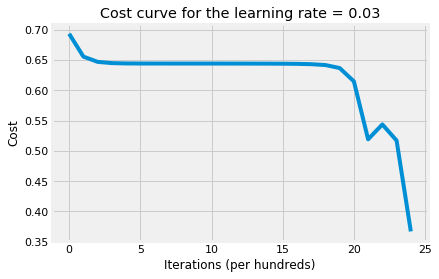

In [5]:
# train NN with regularization
parameters = model_with_regularization(X_train, Y_train, layers_dims,
                                       learning_rate=0.03, num_epochs=2500, print_cost=True,
                                       hidden_layers_activation_fn="tanh",
                                       lambd=0.02)

# print the test accuracy
print("The training accuracy rate: {}".format(accuracy(X_train, parameters, Y_train, "tanh")[-7:]))
print("The test accuracy rate: {}".format(accuracy(X_test, parameters, Y_test, "tanh")[-7:]))

As the results above show, we improved the generalization error by increasing the test accuracy from 78% to 80%. On the other hand, training accuracy decreased from 82.30% to 65.55%.

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Conclusion
</h2>

Regularization is an effective technique to resolve overfitting. Since we don't know true distribution of the data, empirical risk, which is based of empirical distribution, is prone to overfitting. Therefore, the best strategy is to fit training data really well and then use a regularization technique so that the model generalizes well. L2 parameter regularization along with Dropout are two of the most widely used regularization technique in machine learning.
- One of the implicit assumptions of regularization techniques such as L2 and L1 parameter regularization is that the value of the parameters should be zero and try to shrink all parameters towards zero. It's meant to avoid following the training data very well which makes the learning algorithm picks some noise that is not helpful when applied on unseen data.
- The value of $\lambda$ should be tuned to get the best generalization error. We typically use validation set when comparing models with values for $\lambda$s and pick the one with the lowest validation error.
- Only use regularization if the model suffers from overfitting, i.e training error << validation error.
- If after using regularization the validation error is still high, then we're most likely in the underfitting region. In other words, our model is still too simple and already has high bias. Therefore, add complexity to the model and then use regularization.
- Since the majority of tasks we try to solve don't have enough data (or expensive to collect more data), overfitting will be more prevalent in Deep Learning than underfitting given the complexity of neural networks.